In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller

In [6]:
df = pd.read_csv('airline_passengers.csv',index_col='Month',parse_dates = True)

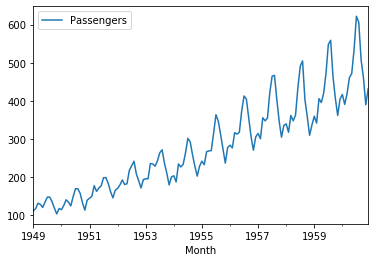

In [7]:
df.plot();

In [8]:
adfuller(df['Passengers'])

(0.8153688792060472,
 0.991880243437641,
 13,
 130,
 {'1%': -3.4816817173418295,
  '5%': -2.8840418343195267,
  '10%': -2.578770059171598},
 996.6929308390189)

In [9]:
def adf(x):
    res = adfuller(x)
    print("Test-Statistic:", res[0])
    print("P-Value:", res[1])
    if res[1] < 0.05:
        print("Stationary")
    else:
        print("Non-Stationary")

In [10]:
adf(df['Passengers'])

Test-Statistic: 0.8153688792060472
P-Value: 0.991880243437641
Non-Stationary


In [13]:
random_value = np.random.randn(100)

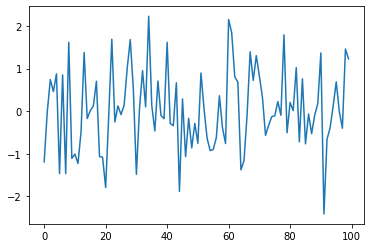

In [15]:
plt.plot(random_value)

In [11]:
adf(np.random.randn(100))

Test-Statistic: -2.0610018387586497
P-Value: 0.2604821981702605
Non-Stationary


In [16]:
random_gamma = np.random.gamma(1,1,100)

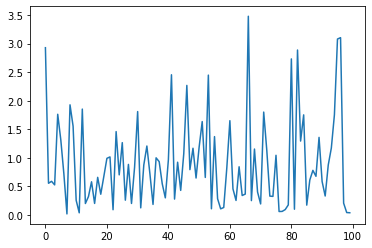

In [17]:
plt.plot(random_gamma)

In [18]:
adf(np.random.gamma(1,1,100))

Test-Statistic: -9.559699337110459
P-Value: 2.4446351836725484e-16
Stationary


In [19]:
df['LogPassengers'] = np.log(df['Passengers'])

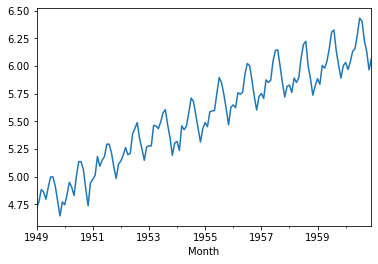

In [22]:
df['LogPassengers'].plot();

In [20]:
adf(df['LogPassengers'])

Test-Statistic: -1.7170170891069605
P-Value: 0.42236677477039125
Non-Stationary


In [23]:
df['Diff'] = df['Passengers'].diff()

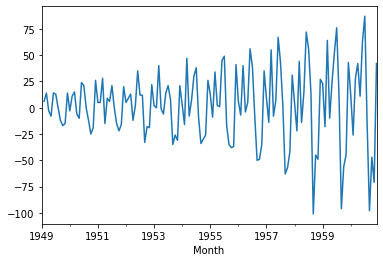

In [24]:
df['Diff'].plot();

In [26]:
adf(df['Diff'].dropna())

Test-Statistic: -2.8292668241700056
P-Value: 0.054213290283824704
Non-Stationary


In [27]:
df['DiffLog'] = df['LogPassengers'].diff()

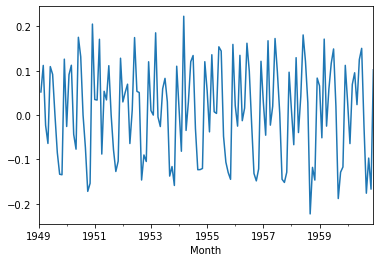

In [28]:
df['DiffLog'].plot()

In [29]:
adf(df['DiffLog'].dropna())

Test-Statistic: -2.717130598388128
P-Value: 0.07112054815085957
Non-Stationary


In [30]:
stocks = pd.read_csv('sp500sub.csv',index_col='Date',parse_dates=True)

In [31]:
stocks.head()

,Open,High,Low,Close,Adj Close,Volume,Name
Date,,,,,,,
2010-01-04,9.22,9.51,9.17,9.50,9.50,1865400.0,INCY
2010-01-05,9.51,10.29,9.45,10.27,10.27,7608900.0,INCY
2010-01-06,10.38,11.09,10.35,11.00,11.00,8046700.0,INCY
2010-01-07,11.00,11.06,10.62,10.82,10.82,3680300.0,INCY
2010-01-08,10.82,11.00,10.75,10.94,10.94,1529300.0,INCY


In [32]:
goog = stocks[stocks['Name'] == 'GOOG'][['Close']]

In [33]:
goog['LogPrice'] = np.log(goog['Close'])

In [34]:
goog['LogRet'] = goog['LogPrice'].diff()

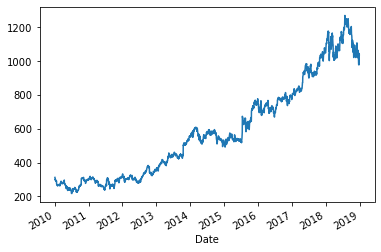

In [37]:
goog['Close'].plot();

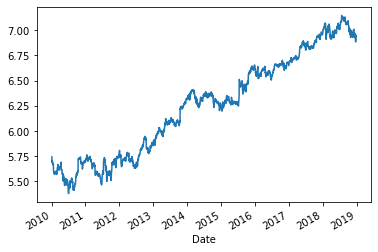

In [35]:
goog['LogPrice'].plot();

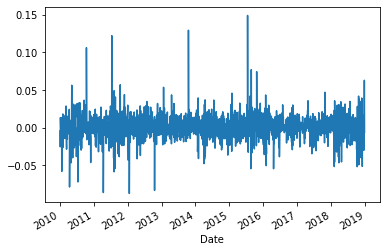

In [36]:
goog['LogRet'].plot();

In [38]:
adf(goog['LogPrice'])

Test-Statistic: -0.4181902578906145
P-Value: 0.9070170677498406
Non-Stationary


In [39]:
adf(goog['LogRet'].dropna())

Test-Statistic: -46.66748022773704
P-Value: 0.0
Stationary


In [42]:
sbux = stocks[stocks['Name'] == 'SBUX'][['Close']]
sbux['LogPrice'] = np.log(sbux['Close'])
sbux['LogRet'] = sbux['LogPrice'].diff()

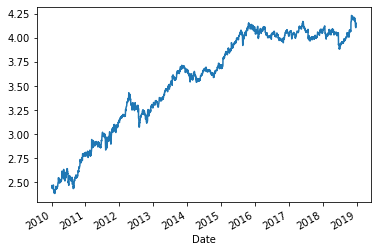

In [43]:
sbux['LogPrice'].plot();

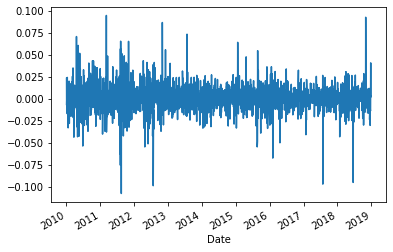

In [44]:
sbux['LogRet'].plot();

In [45]:
adf(sbux['LogPrice'])

Test-Statistic: -1.9020133583899939
P-Value: 0.33111455698537906
Non-Stationary


In [46]:
adf(sbux['LogRet'].dropna())

Test-Statistic: -30.086501426958183
P-Value: 0.0
Stationary
